In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [174]:
#mouth
open_mouth_ds = pd.read_csv('open_mouth.csv', delimiter = ';', header = None)
smile_ds = pd.read_csv('smile.csv', delimiter = ';', header = None)
kiss_ds = pd.read_csv('kiss.csv', delimiter = ';', header = None)
pl_ds = pd.read_csv('purse_lips.csv', delimiter = ';', header = None)

#brows
surprised_ds = pd.read_csv('surprised.csv', delimiter = ';', header = None)
angry_ds = pd.read_csv('angry.csv', delimiter = ';', header = None)


In [175]:
#each row represents one frame
#the columns have the position information in x,y pairs e.g col 0 is the x coordinate for the first landmark, col1 is the y coordinate
def pos_time (dataset, index):
    index = index-1
    x = dataset.iloc[:, index*2:index*2+2].values
    return x

In [176]:
#all measurements are normalised against the distance between the eyes
#vertical length of the mouth

def distance(mouth_ds, p1, p2):
    v1 = pos_time(mouth_ds, p1)
    v2 = pos_time(mouth_ds, p2)
    n1 = pos_time(mouth_ds, 40)
    n2 = pos_time(mouth_ds, 43)
    ret = []
    for i in range(len(v1)):
        v = (abs(math.dist(v1[i], v2[i])))
        n = (abs(math.dist(n1[i], n2[i])))
        ret.append(v/n)
    return ret

def mouth_vlen(mouth_ds):
    return distance(mouth_ds, 52,58)

#horizontal length of the mouth
def mouth_hlen(mouth_ds):
    return distance(mouth_ds, 55, 49)

def right_brow(brow_ds):
    return distance(brow_ds, 25, 47)

def left_brow(brow_ds):
    return distance(brow_ds, 20, 42)

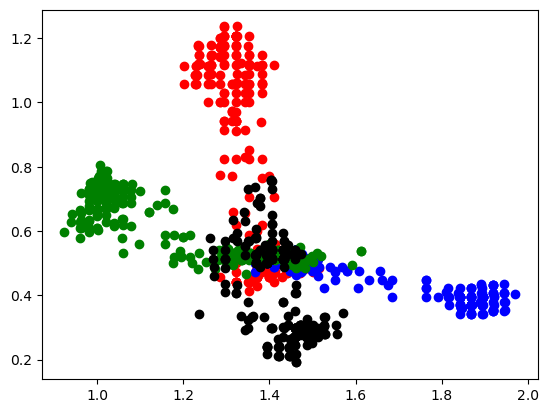

In [177]:
#different gestures represented
x_om = mouth_hlen(open_mouth_ds)
y_om = mouth_vlen(open_mouth_ds)

x_s = mouth_hlen(smile_ds)
y_s = mouth_vlen(smile_ds)

x_k = mouth_hlen(kiss_ds)
y_k = mouth_vlen(kiss_ds)

x_pl = mouth_hlen(pl_ds)
y_pl = mouth_vlen(pl_ds)




plt.scatter(x_om, y_om , color = 'red')
plt.scatter(x_s, y_s , color = 'blue')
plt.scatter(x_k, y_k , color = 'green')
plt.scatter(x_pl, y_pl , color = 'black')


plt.show()

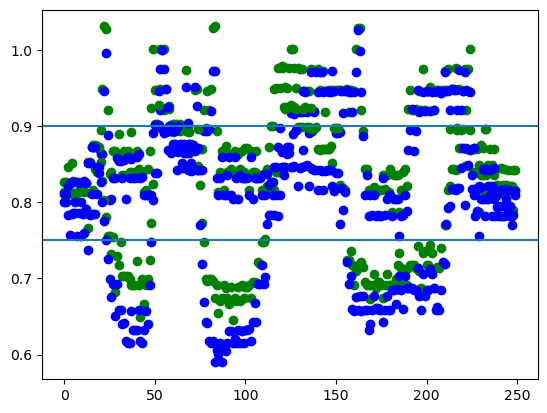

In [178]:

w_bs = right_brow(surprised_ds)
z_bs = left_brow(surprised_ds)
plt.scatter(range(len(w_bs)), w_bs, color = 'green')
plt.scatter(range(len(z_bs)), z_bs, color = 'blue')

w_ba = right_brow(angry_ds)
z_ba= left_brow(angry_ds)
plt.scatter(range(len(w_ba)), w_ba, color = 'green')
plt.scatter(range(len(z_ba)), z_ba, color = 'blue')

plt.axhline(y=0.75)
plt.axhline(y = 0.90)

plt.show()

In [188]:
#Unfortunately these captures were "making the gestures" (i.e. opening and closing the mouth) 
#That's why I will need to isloate each gesture from the rest position and I will also give it a state number for classification purposes
new_ds = []
all_ds = []



def process_facial_expression_dataset(x_data, y_data, w_data, z_data, expression_ds, threshold_variable_name, min_threshold, max_threshold, category_value, new_ds, all_ds):
    i = 0
    for x_i, y_i, w_i, z_i in zip(x_data, y_data, w_data, z_data):
        threshold_variable = locals()[threshold_variable_name]
        if threshold_variable >= min_threshold and threshold_variable <= max_threshold:
            cate = category_value
        else:
            cate = 0
        new_ds.append([x_i, y_i, w_i, z_i, cate])
        all_ds.append([*expression_ds.iloc[i, :].values, cate])
        i += 1

w_om = right_brow(open_mouth_ds)
z_om= left_brow(open_mouth_ds)  
process_facial_expression_dataset(x_om, y_om, w_om, z_om, open_mouth_ds, 'y_i', 0.9, 5,  1, new_ds, all_ds)
    


w_s = right_brow(smile_ds)
z_s= left_brow(smile_ds)   
i = 0      
process_facial_expression_dataset(x_s, y_s, w_s, z_s, smile_ds, 'x_i', 1.7, 5, 2, new_ds, all_ds)


w_k = right_brow(kiss_ds)
z_k= left_brow(kiss_ds)
process_facial_expression_dataset(x_k, y_k, w_k, z_k, kiss_ds, 'x_i', 0, 1.15, 3, new_ds, all_ds)

    
w_pl = right_brow(pl_ds)
z_pl= left_brow(pl_ds)  
process_facial_expression_dataset(x_pl, y_pl, w_pl, z_pl, pl_ds, 'y_i', 0, 0.4, 4, new_ds, all_ds)

   
x_bs = mouth_hlen(surprised_ds)
y_bs = mouth_vlen(surprised_ds)
process_facial_expression_dataset(x_bs, y_bs, w_bs, z_bs, surprised_ds, 'w_i', 0.9, 5, 5, new_ds, all_ds)

x_ba = mouth_hlen(angry_ds)
y_ba = mouth_vlen(angry_ds)
process_facial_expression_dataset(x_ba, y_ba, w_ba, z_ba, angry_ds, 'w_i', 0, 0.75, 6, new_ds, all_ds)

In [190]:
headers = ['mouth_hlen', 'mouth_vlen', 'right brow height', 'left brow height', 'gesture']
df = pd.DataFrame(new_ds, columns=headers)
print(df)

headers = [i for i in range(len(all_ds[0]))]
alldf = pd.DataFrame(all_ds, columns=headers)
print(alldf)

      mouth_hlen  mouth_vlen  right brow height  left brow height  gesture
0       1.470882    0.500864           0.796293          0.794662        0
1       1.470882    0.500864           0.796293          0.794662        0
2       1.400292    0.486554           0.800510          0.771957        0
3       1.428274    0.457848           0.771643          0.771643        0
4       1.470882    0.500864           0.824054          0.794662        0
...          ...         ...                ...               ...      ...
1495    1.473758    0.500000           0.842582          0.816356        0
1496    1.437484    0.489710           0.821844          0.795024        0
1497    1.436069    0.487214           0.821035          0.769927        0
1498    1.473758    0.500000           0.842582          0.815086        0
1499    1.473758    0.473759           0.842582          0.815086        0

[1500 rows x 5 columns]
      0    1    2    3    4    5    6    7    8    9    ...  127  128  129 

In [191]:
df.to_csv('mouth_gestures_2.csv', index=False)
alldf.to_csv('mouth_gestures_all.csv', index=False)